In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = sns.load_dataset('iris')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Bài toán: dựa vào các chỉ số: sepal_length, sepal_width, petal_length, petal_width để xác định loại hoa (species) 

In [11]:
# lựa chọn thuật toán RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
# chuẩn bị dữ liệu -> xác định X và y
X = df.drop(columns=['species'])
y = df['species']

In [8]:
# tách dữ liệu train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [9]:
# khởi tạo model
model = RandomForestClassifier(n_estimators = 100) # khởi tạo forest với 100 cây

In [10]:
# huấn luyện model với train data
model.fit(X_train, y_train)

RandomForestClassifier()

In [14]:
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

In [15]:
print('Train accuracy:', accuracy_score(y_train, yhat_train))
print('Test accuracy:', accuracy_score(y_test, yhat_test))

Train accuracy: 1.0
Test accuracy: 1.0


In [16]:
df_test = pd.DataFrame({
    'Actual': y_test,
    'Prediction': yhat_test
})
df_test.head()

,Actual,Prediction
73,versicolor,versicolor
18,setosa,setosa
118,virginica,virginica
78,versicolor,versicolor
76,versicolor,versicolor


In [17]:
# làm việc với: 10, 20, 30, 50, 70, 100, 150 cây => Chọn ra forest phù hợp nhất theo số lượng cây
# dựa vào accuracy và R-Score --> lựa chọn n_estimator
# n_estimator ~ 20

In [18]:
#Xem thông tin của 3 cây đầu tiên trong rừng
model.estimators_[:3]

[DecisionTreeClassifier(max_features='auto', random_state=491574450),
 DecisionTreeClassifier(max_features='auto', random_state=1844973273),
 DecisionTreeClassifier(max_features='auto', random_state=1214551796)]

In [19]:
# đo lường precision, recall, f1-score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

In [20]:
precision = precision_score(y_test, yhat_test, average='micro')
recall = recall_score(y_test, yhat_test, average='micro')
f1 = f1_score(y_test, yhat_test, average='micro')

print('Precision score:', precision)
print('Recall score:', recall)
print('F1 score:', f1)

Precision score: 1.0
Recall score: 1.0
F1 score: 1.0


In [21]:
print('Confusion matrix:')
print(confusion_matrix(y_test, yhat_test))

Confusion matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [36]:
# dự đoán trên dữ liệu mới
X_new = [[4.5, 3.1, 1.4, 0.25],
         [6.5, 3.0, 4.3, 1.5],
         [5.9, 3.1, 5.2, 1.8]]
y_new = model.predict(X_new)
y_new

array(['setosa', 'versicolor', 'virginica'], dtype=object)

### Xem các thuộc tính quan trọng nhất

In [22]:
model.feature_importances_

array([0.08123696, 0.02801367, 0.44983252, 0.44091684])

In [25]:
importance_features = pd.Series(model.feature_importances_, index = X.columns)
importance_features = importance_features.sort_values(ascending=False)
importance_features

petal_length    0.449833
petal_width     0.440917
sepal_length    0.081237
sepal_width     0.028014
dtype: float64

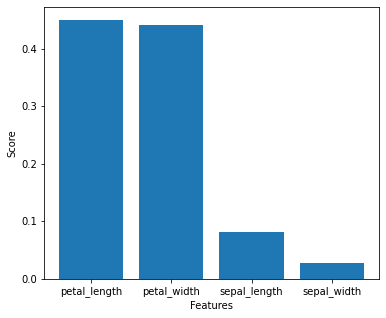

In [27]:
plt.figure(figsize=(6,5))
plt.bar(importance_features.index, importance_features)
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

In [28]:
# lựa chọn 2 thuộc tính có điểm số cao nhất: petal_length và petal_width

In [29]:
X2 = df[['petal_length', 'petal_width']]
y2 = df['species']

In [30]:
# tách dữ liệu train và test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state=42)

In [31]:
model2 = RandomForestClassifier(n_estimators=100)

In [32]:
model2.fit(X2_train, y2_train)

RandomForestClassifier()

In [34]:
y2hat_test = model2.predict(X2_test)

In [35]:
print('Accuracy score:', accuracy_score(y2_test, y2hat_test))

Accuracy score: 1.0


In [37]:
# dự đoán trên dữ liệu mới
X2_new = [[1.4, 0.25],
          [4.3, 1.5],
          [5.2, 1.8]]
y2_new = model2.predict(X2_new)
y2_new

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [38]:
# tìm max_depth trung bình của rừng
lst_max_depth = []
for tree in model2.estimators_:
    lst_max_depth.append(tree.tree_.max_depth)

print('Average max depth of forest:', sum(lst_max_depth) / len(lst_max_depth))

Average max depth of forest: 5.42


In [39]:
lst_max_depth = []
for tree in model.estimators_:
    lst_max_depth.append(tree.tree_.max_depth)

print('Average max depth of forest:', sum(lst_max_depth) / len(lst_max_depth))

Average max depth of forest: 5.29
